In [1]:
%run phugoid.py
%matplotlib inline
import math
import numpy 
from matplotlib import pyplot

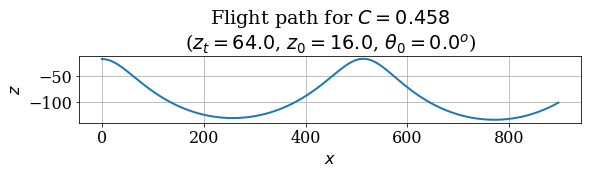

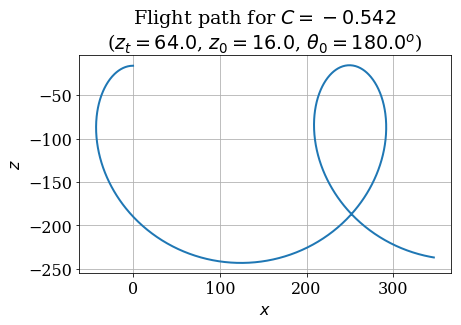

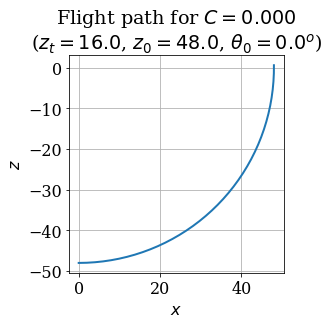

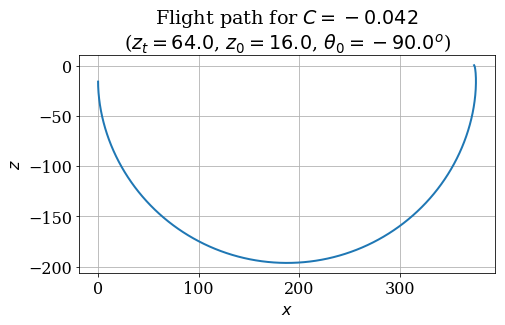

In [2]:
# Initial conditions: zt = 64.0, z0 = 16.0, theta0 = 0.0.
plot_flight_path(64.0, 16.0, 0.0)
# Initial conditions: zt = 64.0, z0 = 16.0, theta0 = 180.0.
plot_flight_path(64.0, 16.0, 180.0)
# Initial conditions: zt = 16.0, z0 = 48.0, theta0 = 0.0.
plot_flight_path(16.0, 48.0, 0.0)
# Initial conditions: zt = 64.0, z0 = 16.0, theta0 = -90.0.
plot_flight_path(64.0, 16.0, -90.0)

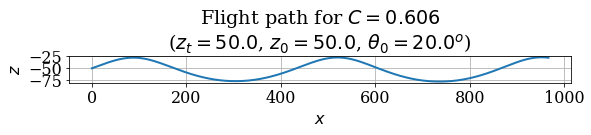

In [3]:
plot_flight_path(50, 50, 20)

In [29]:
# Create the time grid.
T = 100.0  # length of the time-interval
dt = 0.02  # time-step size
N = int(T / dt) + 1  # number of time steps
t = numpy.linspace(0.0, T, num=N)  # time grid
print(t)

[0.000e+00 2.000e-02 4.000e-02 ... 9.996e+01 9.998e+01 1.000e+02]


In [28]:
# Create the time grid (challenge).
T = 100.0  # length of the time-interval
dt = 0.02  # time-step size
t = numpy.arange(0.0, T, dt)  # time grid
t = numpy.append(t,T)
print(t)

[0.000e+00 2.000e-02 4.000e-02 ... 9.996e+01 9.998e+01 1.000e+02]


In [30]:
# Set the initial conditions.
z0 = 100.0  # altitude
b0 = 10.0  # upward velocity resulting from gust
zt = 100.0  # trim altitude
g = 9.81  # acceleration due to gravity

# Set the initial value of the numerical solution.
u = numpy.array([z0, b0])

# Create an array to store the elevation value at each time step.
z = numpy.zeros(N)
z[0] = z0

# Temporal integration using Euler's method.
for n in range(1, N):
    rhs = numpy.array([u[1], g * (1 - u[0] / zt)]) #tableau avec (b_n, )
    u = u + dt * rhs
    z[n] = u[0]

In [31]:
len(z)

5001

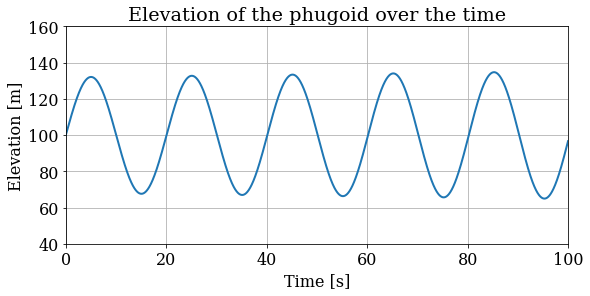

In [32]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

# Plot the solution of the elevation.
pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
pyplot.title('Elevation of the phugoid over the time')  # set the title
pyplot.xlabel('Time [s]')  # set the x-axis label
pyplot.ylabel('Elevation [m]')  # set the y-axis label
pyplot.xlim(t[0], t[-1])  # set the x-axis limits
pyplot.ylim(40.0, 160.0)  # set the y-axis limits
pyplot.grid()  # set a background grid to improve readability
pyplot.plot(t, z, color='C0', linestyle='-', linewidth=2);

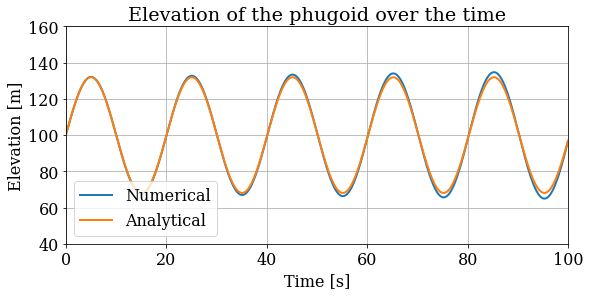

In [33]:
z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) +
           (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)
# Plot the numerical solution and the exact solution.
pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
pyplot.title('Elevation of the phugoid over the time')  # set the title
pyplot.xlabel('Time [s]')  # set the x-axis label
pyplot.ylabel('Elevation [m]')  # set the y-axis label
pyplot.xlim(t[0], t[-1])  # set the x-axis limits
pyplot.ylim(40.0, 160.0)  # set the y-axis limits
pyplot.grid()  # set a background grid to improve readability
pyplot.plot(t, z, label='Numerical',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(t, z_exact, label='Analytical',
            color='C1', linestyle='-', linewidth=2)
pyplot.legend();  # set the legend

In [34]:
# Set the list of time-step sizes.
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]

# Create an empty list that will contain the solution of each grid.
z_values = []

for dt in dt_values:
    N = int(T / dt) + 1  # number of time-steps
    t = numpy.linspace(0.0, T, num=N)  # time grid
    # Set the initial conditions.
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    # Temporal integration using Euler's method.
    for n in range(1, N):
        rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0]  # store the elevation at time-step n+1
    z_values.append(z)  # store the elevation over the time

In [35]:
def l1_error(z, z_exact, dt):
    """
    Computes and returns the error
    (between the numerical and exact solutions)
    in the L1 norm.
    
    Parameters
    ----------
    z : numpy.ndarray
        The numerical solution as an array of floats.
    z_exact : numpy.ndarray
        The analytical solution as an array of floats.
    dt : float
        The time-step size.
        
    Returns
    -------
    error: float
        L1-norm of the error with respect to the exact solution.
    """
    error = dt * numpy.sum(numpy.abs(z - z_exact))
    return error

In [36]:
# Create an empty list to store the errors on each time grid.
error_values = []

for z, dt in zip(z_values, dt_values):
    N = int(T / dt) + 1  # number of time-steps
    t = numpy.linspace(0.0, T, num=N)  # time grid
    # Compute the exact solution.
    z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) +
               (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)
    # Calculate the L1-norm of the error for the present time grid.
    error_values.append(l1_error(z, z_exact, dt))

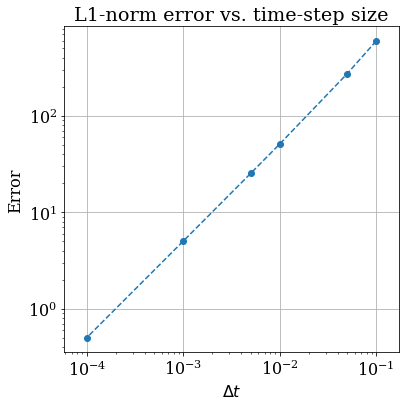

In [37]:
# Plot the error versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm error vs. time-step size')  # set the title
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Error')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_values, error_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally

In [38]:
tbl_a = ['un','deux','trois']
tbl_b = [1,2,3]
for a, b in zip(tbl_a, tbl_b):
    print(a,b)

un 1
deux 2
trois 3


In [83]:
def twoDimEulerMethod(f,t0,T,dt,u0):
    """t0 : valeur initiale de t
       T : valeur finale de t
       dt : intervalle de temps
       u0 : condition initial sur u à t = t0
       Résout une équation du type u'(t) = f(u,t) où u est dans R^n
       """
    
    N = int((T-t0) / dt) + 1  # number of time steps
    t = numpy.linspace(t0, T, num=N)  # time grid
    u = numpy.array(u0)
    z = numpy.zeros(N)
    z[0] = u0[1]
    
    for n in range(1, N):
        u = u + dt * f(u,n)
        z[n] = u[0]
                                 
    return [t,z]

In [84]:
def EulerMethodPlot(t,z):
    # Set the font family and size to use for Matplotlib figures.
    pyplot.rcParams['font.family'] = 'serif'
    pyplot.rcParams['font.size'] = 16

    # Plot the solution of the elevation.
    pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
    pyplot.title('Elevation of the phugoid over the time')  # set the title
    pyplot.xlabel('Time [s]')  # set the x-axis label
    pyplot.ylabel('Elevation [m]')  # set the y-axis label
    pyplot.xlim(t[0], t[-1])  # set the x-axis limits
    pyplot.ylim(40.0, 160.0)  # set the y-axis limits
    pyplot.grid()  # set a background grid to improve readability
    pyplot.plot(t, z, color='C0', linestyle='-', linewidth=2);

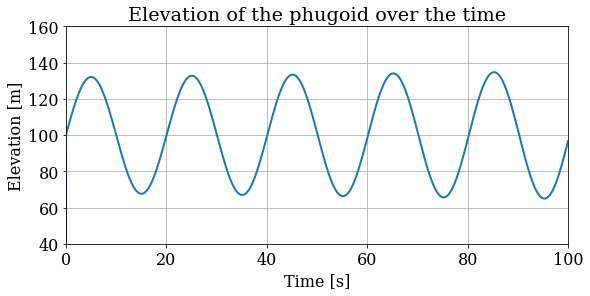

In [85]:
z0 = 100.0  # altitude
b0 = 10.0  # upward velocity resulting from gust
g = 9.81
zt = 100.0

def f(u,t):
    return numpy.array([u[1], g * (1 - u[0] / zt)])

a = twoDimEulerMethod(f,0.0,100.0,0.02,[z0,b0])
EulerMethodPlot(a[0],a[1])

In [86]:
a[1] == z

C:\Users\Louan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [44]:
# Set the list of time-step sizes.
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]

# Create an empty list that will contain the solution of each grid.
z_values = []

for dt in dt_values:
    z = twoDimEulerMethod(f,0.0,100.0,dt,[z0,b0])[1]
    z_values.append(z)  # store the elevation over the time

In [45]:
# Create an empty list to store the errors on each time grid.
error_values = []

for z, dt in zip(z_values, dt_values):
    N = int(T / dt) + 1  # number of time-steps
    t = numpy.linspace(0.0, T, num=N)  # time grid
    # Compute the exact solution.
    z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) +
               (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)
    # Calculate the L1-norm of the error for the present time grid.
    error_values.append(l1_error(z, z_exact, dt))

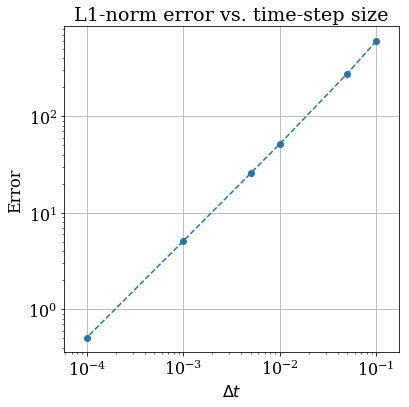

In [46]:
# Plot the error versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm error vs. time-step size')  # set the title
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Error')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_values, error_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally

In [47]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

# Set parameters.
g = 9.81  # gravitational acceleration (m.s^{-2})
vt = 30.0  # trim velocity (m.s)
CD = 1.0 / 40  # drag coefficient
CL = 1.0  # lift coefficient

# Set initial conditions.
v0 = vt  # start at the trim velocity
theta0 = 0.0  # trajectory angle
x0 = 0.0  # horizontal position
y0 = 1000.0  # vertical position (altitude)

In [48]:
def rhs_phugoid(u, CL, CD, g, vt):
    """
    Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : list or numpy.ndarray
        Solution at the previous time step
        as a list or 1D array of four floats.
    CL : float
        Lift coefficient.
    CD : float
        Drag coefficient.
    g : float
        Gravitational acceleration.
    vt : float
        Trim velocity.
    
    Returns
    -------
    rhs : numpy.ndarray
        The right-hand side of the system
        as a 1D array of four floats.
    """
    v, theta, x, y = u
    rhs = numpy.array([-g * math.sin(theta) - CD / CL * g / vt**2 * v**2,
                       -g * math.cos(theta) / v + g / vt**2 * v,
                       v * math.cos(theta),
                       v * math.sin(theta)])
    return rhs

In [49]:
def euler_step(u, f, dt, *args):
    """
    Returns the solution at the next time step using Euler's method.
    
    Parameters
    ----------
    u : numpy.ndarray
        Solution at the previous time step
        as a 1D array of floats.
    f : function
        Function to compute the right-hand side of the system.
    dt : float
        Time-step size.
    args : tuple, optional
        Positional arguments to pass to the function f.
    
    Returns
    -------
    u_new : numpy.ndarray
        The solution at the next time step
        as a 1D array of floats.
    """
    u_new = u + dt * f(u, *args)
    return u_new

In [50]:
T = 100.0  # length of the time interval
dt = 0.1  # time-step size
N = int(T / dt) + 1  # number of time steps

# Create array to store the solution at each time step.
u = numpy.empty((N, 4))
# Set the initial conditions.
u[0] = numpy.array([v0, theta0, x0, y0])

# Time integration with Euler's method.
for n in range(N - 1):
    u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)

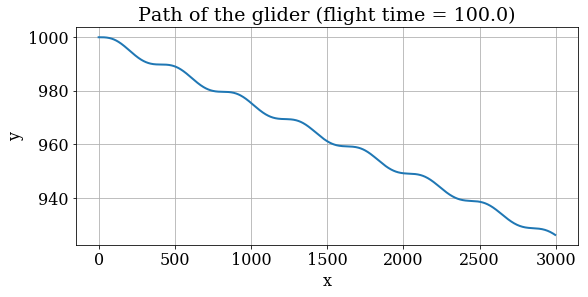

In [51]:
# Get the glider's position over the time.
x = u[:, 2]
y = u[:, 3]

# Plot the path of the glider.
pyplot.figure(figsize=(9.0, 4.0))
pyplot.title('Path of the glider (flight time = {})'.format(T))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.grid()
pyplot.plot(x, y, color='C0', linestyle='-', linewidth=2);

In [52]:
# Set the list of time-step sizes.
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001]

# Create an empty list that will contain the solution of each grid.
u_values = []

for dt in dt_values:
    N = int(T / dt) + 1  # number of time-steps
    # Create array to store the solution at each time step.
    u = numpy.empty((N, 4))
    # Set the initial conditions.
    u[0] = numpy.array([v0, theta0, x0, y0])
    # Temporal integration using Euler's method.
    for n in range(N - 1):
        u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    # Store the solution for the present time-step size
    u_values.append(u)

In [53]:
def l1_diff(u_coarse, u_fine, dt):
    """
    Returns the difference in the L1-norm between the solution on
    a coarse grid and the solution on a fine grid.
    
    Parameters
    ----------
    u_coarse : numpy.ndarray
        Solution on the coarse grid as an array of floats.
    u_fine : numpy.ndarray
        Solution on the fine grid as an array of floats.
    dt : float
        Time-step size.
    
    Returns
    -------
    diff : float
        The difference between the two solutions in the L1-norm
        scaled by the time-step size.
    """
    N_coarse = len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt * numpy.sum(numpy.abs(u_coarse - u_fine[::ratio]))
    return diff

In [54]:
# Create an empty list to store the difference in the solution
# between two consecutive grids.
diff_values = []

for i, dt in enumerate(dt_values[:-1]):
    diff = l1_diff(u_values[i][:, 2], u_values[-1][:, 2], dt)
    diff_values.append(diff)

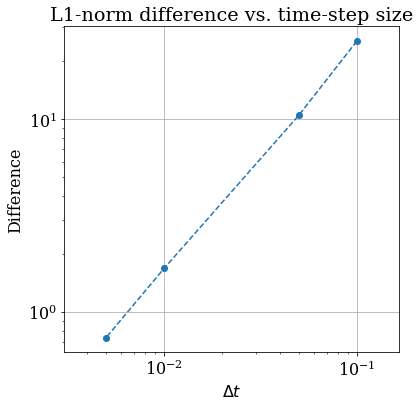

In [55]:
# Plot the difference versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm difference vs. time-step size')  # set the title
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Difference')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally

In [56]:
r = 2  # refinement ratio for the time-step size
h = 0.001  # base grid size

dt_values2 = [h, r * h, r**2 * h]
u_values2 = []

for dt in dt_values2:
    N = int(T / dt) + 1  # number of time steps
    # Create array to store the solution at each time step.
    u = numpy.empty((N, 4))
    # Set initial conditions.
    u[0] = numpy.array([v0, theta0, x0, y0])
    # Time integration using Euler's method.
    for n in range(N - 1):
        u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    # Store the solution.
    u_values2.append(u)

# Calculate f2 - f1.
f2_f1 = l1_diff(u_values2[1][:, 2], u_values2[0][:, 2], dt_values2[1])
# Calculate f3 - f2.
f3_f2 = l1_diff(u_values2[2][:, 2], u_values2[1][:, 2], dt_values2[2])
# Calculate the observed order of convergence.
p = math.log(f3_f2 / f2_f1) / math.log(r)
print('Observed order of convergence: p = {:.3f}'.format(p))

Observed order of convergence: p = 1.014


In [57]:
p = 7
r = numpy.array([11.2, 4.7, 6.6])
a = p/r
print(math.sin(a[1])**3)

0.9900910096418035


In [60]:
def convRatio(f1,f2,f3,r):
    return (math.log((f3-f2)/(f2-f1))/math.log(r))

In [61]:
print(convRatio(1.475,1.500,1.600,0.5))
print(convRatio(1.600,1.500,1.475,0.5))

-2.000000000000006
2.000000000000006


In [89]:
ms = 50
g = 9.81
rho = 1.091
A = math.pi*(0.5)**2
ve = 325
CD = 0.15
mp0 = 100.0
v0 = 0
h0 = 0

t0= 0.0
T = 10.0
dt = 0.1

In [90]:
# mp en fonction du temps
def mp_point(t):
    if t < 4.5:
        out = 20.0
    else:
        out = 0
    return out
mp = []
t = 0
while t <= T:
    mp.append(float(math.ceil(mp0-t*mp_point(t))))
    t = t + dt
    
print(mp)

[100.0, 98.0, 96.0, 94.0, 92.0, 90.0, 88.0, 86.0, 84.0, 82.0, 80.0, 78.0, 76.0, 74.0, 72.0, 70.0, 68.0, 66.0, 64.0, 62.0, 60.0, 58.0, 56.0, 54.0, 52.0, 50.0, 48.0, 46.0, 44.0, 42.0, 40.0, 38.0, 36.0, 34.0, 32.0, 30.0, 28.0, 26.0, 24.0, 22.0, 20.0, 18.0, 16.0, 14.0, 12.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [112]:
print(mp[int(3.2/dt)])

36.0


In [127]:
def f(u,t):
    return -((ms+mp[int(t/dt)])*g+mp_point(t)*ve-0.5*rho+u*math.fabs(u)*A*CD)/(ms+mp[int(t/dt)])

def oneDimEulerMethod(f,t0,T,dt,f0):
    """t0 : valeur initiale de t
       T : valeur finale de t
       dt : intervalle de temps
       u0 : condition initial sur u à t = t0
       Résout une équation du type u'(t) = f(u,t) où u est dans R^n
       """
    
    N = int((T-t0) / dt) + 1  # number of time steps
    t = numpy.linspace(t0, T, num=N)  # time grid
    u = f0
    out = numpy.zeros(N)
    out[0] = f0
    
    for n in range(1, N):
        u = u + dt * f(u,n*dt)
        out[n] = -u
                                 
    return [t,out]

In [128]:
a = oneDimEulerMethod(f,t0,T,dt,v0)
print(a[1])

[  0.           5.37252331  10.80287539  16.28783779  21.82390845
  27.40729683  33.03392042  38.69940264  44.39907242  50.12796547
  55.88082755  61.65211972  67.43602578  73.22646201  79.01708926
  84.80132749  90.57237285  96.32321728 102.04667059 107.73538508
 113.38188258 118.97858381 124.51783986 129.99196578 135.39327582
 140.71412031 145.94692371 151.08422363 156.11871042 161.04326693
 165.85100814 170.5353202  175.08989844 179.50878405 183.78639894
 187.91757837 191.89760117 195.72221695 199.38767026 202.89072124
 206.22866273 209.39933351 212.40112771 215.1769132  217.84296835
 215.09645381 212.44332895 209.8792931  207.40030411 205.00255919
 202.68247733 200.43668335 198.26199324 196.15540077 194.11406521
 192.13530003 190.21656258 188.35544452 186.54966304 184.79705276
 183.09555824 181.44322707 179.83820348 178.27872239 176.76310396
 175.28974842 173.85713141 172.46379952 171.10836624 169.7895081
 168.50596114 167.25651759 166.04002277 164.8553722  163.70150887
 162.577420

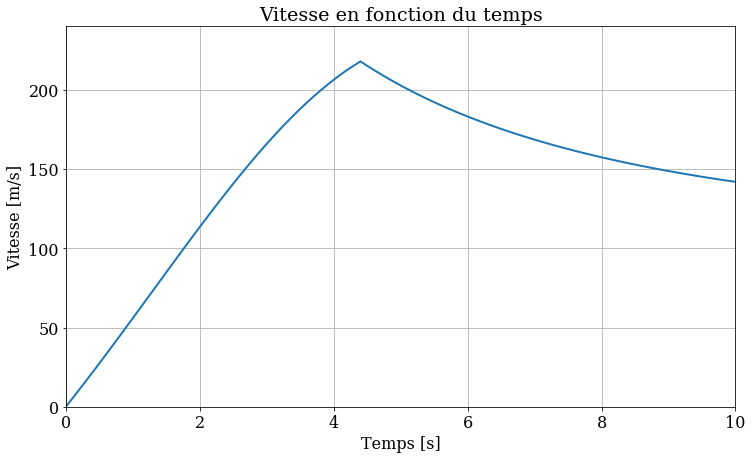

In [130]:
t = a[0]
v = numpy.array(a[1])    
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

# Plot the solution of the elevation.
pyplot.figure(figsize=(12.0, 7.0))  # set the size of the figure
pyplot.title('Vitesse en fonction du temps')  # set the title
pyplot.xlabel('Temps [s]')  # set the x-axis label
pyplot.ylabel('Vitesse [m/s]')  # set the y-axis label
pyplot.xlim(t[0], t[-1])  # set the x-axis limits
pyplot.ylim(0.0, 240.0)  # set the y-axis limits
pyplot.grid()  # set a background grid to improve readability
pyplot.plot(t, v, color='C0', linestyle='-', linewidth=2);

In [141]:
h = [h0]
for n in range(1,len(v)):
    h.append(h[n-1]+dt*v[n-1])
print(h)

[0, 0.0, 0.5372523310810812, 1.6175398703347281, 3.2463236495728465, 5.42871449409315, 8.16944417671047, 11.472836218519276, 15.342776482991354, 19.78268372512201, 24.795480272196386, 30.383563027108238, 36.54877499875756, 43.292377576592244, 50.61502377753789, 58.51673270306367, 66.99686545164096, 76.05410273704761, 85.68642446554581, 95.8910915246283, 106.66463003252399, 118.00281829075819, 129.90067667159846, 142.3524606580676, 155.3516572363155, 168.89098481853503, 182.96239684938215, 197.55708922020247, 212.66551158354778, 228.27738262584165, 244.38170931906666, 260.96681013351326, 278.0203421535399, 295.5293319975898, 313.4802104030812, 331.8588502969474, 350.6506081342801, 369.84036825143403, 389.41258994677816, 409.3513569726573, 429.64042909664437, 450.26329536929876, 471.2032287198051, 492.4433414903344, 513.9610328102578, 535.7453296457197, 557.2549750267863, 578.4993079221107, 599.4872372320635, 620.227267643365, 640.7275235622204, 660.9957712952637, 681.0394396304317, 700.

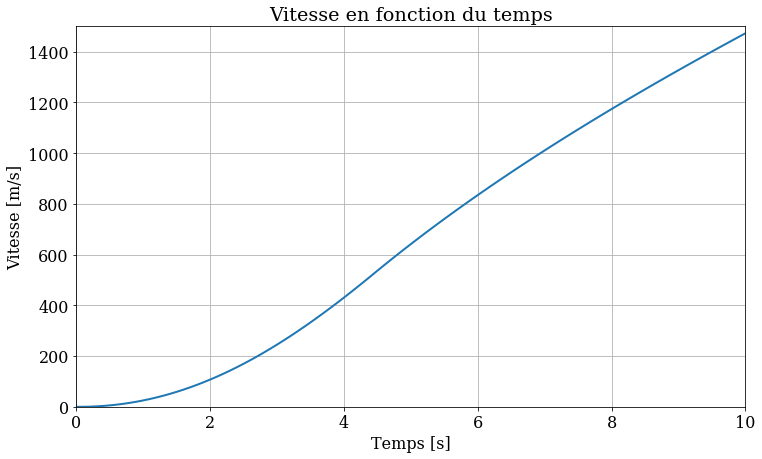

In [142]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

# Plot the solution of the elevation.
pyplot.figure(figsize=(12.0, 7.0))  # set the size of the figure
pyplot.title('Vitesse en fonction du temps')  # set the title
pyplot.xlabel('Temps [s]')  # set the x-axis label
pyplot.ylabel('Vitesse [m/s]')  # set the y-axis label
pyplot.xlim(t[0], t[-1])  # set the x-axis limits
pyplot.ylim(0.0, 1500.0)  # set the y-axis limits
pyplot.grid()  # set a background grid to improve readability
pyplot.plot(t, h, color='C0', linestyle='-', linewidth=2);

In [143]:
max(v)

217.84296835461822

In [144]:
for i in range(len(v)):
    if v[i] == max(v):
        print(i*0.2)

8.8


In [145]:
h[44]

513.9610328102578